# Countries of the World

By Krzysztof Satola from: [github.com/ksatola](https://github.com/ksatola).

Based on CRISP-DM (Cross Industry Process for Data Mining).

## Business Understanding

### Objectives

In this project, I explore [Countries of the Worlds Kaggle dataset](https://www.kaggle.com/fernandol/countries-of-the-world) to answer the following questions:

1. XXXXHow different regions are compared to each other in terms of their area, population, population density and other attributes? What are distinguishing traits of wealthy and poor regions (GDP)?
2. XXXXXWhat can we do to limit infant mortality?
3. XXXXWhat are the most significant predictors determining country's GDP per capita, the key indicator of economic development of any country?

Next, I write a post to ??? to summarize my findings.

### Dataset Dictionary

- **country** - country name
- **region** - region name
- **population** - number of people within country
- **area** - country area in sq. mi.
- **popdensity** - country population density per sq. mi.
- **coast** - coastline (coast/area) ratio
- **netmigr** - net migration. The net migration rate is the difference between the number of immigrants (people coming into an area) and the number of emigrants (people leaving an area) throughout the year. When the number of immigrants is larger than the number of emigrants, a `positive net migration rate` occurs. A positive net migration rates indicates that there are more people entering than leaving an area. When more emigrate from a country, the result is a `negative net migration rate`, meaning that more people are leaving than entering the area. When there is an equal number of immigrants and emigrants, the net migration rate is balanced ([source](https://en.wikipedia.org/wiki/Net_migration_rate)).
- **infmortality** - infant mortality (per 1000 births)
- **gdp** - Gross Domestic Product (GDP) in $ per capita. The value of all final goods and services produced within a nation in a given year (2013), converted at market exchange rates to current U.S. dollars, divided by the average population for the same year ([source](https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)_per_capita)).
- **literacy** - country literacy level in %
- **phones** - number phones per 1000
- **arable** - percent of arable areas
- **crops** - percent of cropland used to grow food
- **climate** - climate type
- **birthrate** - the birth rate (technically, births/population rate), the total number of live births per 1,000 in a population in 2013 ([source](https://en.wikipedia.org/wiki/Birth_rate)).
- **deathrate** - number of deaths per 1,000 individuals ([source](https://en.wikipedia.org/wiki/Mortality_rate)).
- **agriculture** - percentage of GDP sector composition ratio for agriculture economy sector ([source](https://en.wikipedia.org/wiki/List_of_countries_by_GDP_sector_composition)). Agriculture % + Industry % + Service = 100% of GDP 
- **industry** - percentage of GDP sector composition ratio for industry economy sector
- **service** - percentage of GDP sector composition ratio for service economy sector

## Data Understanding

In [1]:
# Import required libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import pyarrow

%matplotlib inline

# Random state
rstate = 123

pd.options.display.float_format = '{:20.2f}'.format

In [2]:
%load_ext version_information

In [3]:
# Document versions of used libraries
%version_information numpy, pandas, matplotlib, seaborn

Software versions
Python 3.7.1 64bit [Clang 4.0.1 (tags/RELEASE_401/final)]
IPython 7.2.0
OS Darwin 18.2.0 x86_64 i386 64bit
numpy 1.16.2
pandas 0.23.4
matplotlib 3.0.2
seaborn 0.9.0
Fri Mar 22 23:46:38 2019 CET

In [4]:
# Load data from a CSV file
df = pd.read_csv('./data/countries of the world.csv', decimal=',')

In [5]:
# Initial look into the dataset
df.head().T

,0,1,2,3,4
Country,Afghanistan,Albania,Algeria,American Samoa,Andorra
Region,ASIA (EX. NEAR EAST),EASTERN EUROPE,NORTHERN AFRICA,OCEANIA,WESTERN EUROPE
Population,31056997,3581655,32930091,57794,71201
Area (sq. mi.),647500,28748,2381740,199,468
Pop. Density (per sq. mi.),48.00,124.60,13.80,290.40,152.10
Coastline (coast/area ratio),0.00,1.26,0.04,58.29,0.00
Net migration,23.06,-4.93,-0.39,-20.71,6.60
Infant mortality (per 1000 births),163.07,21.52,31.00,9.27,4.05
GDP ($ per capita),700.00,4500.00,6000.00,8000.00,19000.00
Literacy (%),36.00,86.50,70.00,97.00,100.00


In [6]:
df.tail().T

,222,223,224,225,226
Country,West Bank,Western Sahara,Yemen,Zambia,Zimbabwe
Region,NEAR EAST,NORTHERN AFRICA,NEAR EAST,SUB-SAHARAN AFRICA,SUB-SAHARAN AFRICA
Population,2460492,273008,21456188,11502010,12236805
Area (sq. mi.),5860,266000,527970,752614,390580
Pop. Density (per sq. mi.),419.90,1.00,40.60,15.30,31.30
Coastline (coast/area ratio),0.00,0.42,0.36,0.00,0.00
Net migration,2.98,NaN,0.00,0.00,0.00
Infant mortality (per 1000 births),19.62,NaN,61.50,88.29,67.69
GDP ($ per capita),800.00,NaN,800.00,800.00,1900.00
Literacy (%),NaN,NaN,50.20,80.60,90.70


In [7]:
df.sample(5, random_state=rstate).T

,125,122,156,150,79
Country,Malawi,Macau,Pakistan,Nicaragua,Greece
Region,SUB-SAHARAN AFRICA,ASIA (EX. NEAR EAST),ASIA (EX. NEAR EAST),LATIN AMER. & CARIB,WESTERN EUROPE
Population,13013926,453125,165803560,5570129,10688058
Area (sq. mi.),118480,28,803940,129494,131940
Pop. Density (per sq. mi.),109.80,16183.00,206.20,43.00,81.00
Coastline (coast/area ratio),0.00,146.43,0.13,0.70,10.37
Net migration,0.00,4.86,-2.77,-1.22,2.35
Infant mortality (per 1000 births),103.32,4.39,72.44,29.11,5.53
GDP ($ per capita),600.00,19400.00,2100.00,2300.00,20000.00
Literacy (%),62.70,94.50,45.70,67.50,97.50


In [8]:
# Dataset size
df.shape

(227, 20)

## Data Preparation

In [9]:
# Variables
df.columns

Index(['Country', 'Region', 'Population', 'Area (sq. mi.)',
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)', 'Arable (%)',
       'Crops (%)', 'Other (%)', 'Climate', 'Birthrate', 'Deathrate',
       'Agriculture', 'Industry', 'Service'],
      dtype='object')

In [10]:
# Naming convention, simplify column names and build a dataset dictionary (see above)
df.rename(columns={"Country":"country", 
                  "Region":"region", 
                  "Population":"population", 
                  "Area (sq. mi.)":"area", 
                  "Pop. Density (per sq. mi.)":"popdensity", 
                  "Coastline (coast/area ratio)":"coast", 
                  "Net migration":"netmigr", 
                  "Infant mortality (per 1000 births)":"infmortality", 
                  "GDP ($ per capita)":"gdp", 
                  "Literacy (%)":"literacy", 
                  "Phones (per 1000)":"phones", 
                  "Arable (%)":"arable", 
                  "Crops (%)":"crops", 
                  "Other (%)":"other", 
                  "Climate":"climate", 
                  "Birthrate":"birthrate", 
                  "Deathrate":"deathrate", 
                  "Agriculture":"agriculture", 
                  "Industry":"industry", 
                  "Service":"service"}, inplace=True)

In [11]:
df.columns

Index(['country', 'region', 'population', 'area', 'popdensity', 'coast',
       'netmigr', 'infmortality', 'gdp', 'literacy', 'phones', 'arable',
       'crops', 'other', 'climate', 'birthrate', 'deathrate', 'agriculture',
       'industry', 'service'],
      dtype='object')

In [12]:
# Examplary country data
df.iloc[163]

country                                     Poland 
region          EASTERN EUROPE                     
population                                 38536869
area                                         312685
popdensity                                   123.30
coast                                          0.16
netmigr                                       -0.49
infmortality                                   8.51
gdp                                        11100.00
literacy                                      99.80
phones                                       306.30
arable                                        45.91
crops                                          1.12
other                                         52.97
climate                                        3.00
birthrate                                      9.85
deathrate                                      9.89
agriculture                                    0.05
industry                                       0.31
service     

In [13]:
# Is there duplicated data in the dataset?
df.duplicated().mean()

0.0

In [14]:
# Country name can be treated as an unique identifier (no duplicated rows)
df.country.value_counts().mean()

1.0

In [15]:
# What are the dataset column data types?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
country         227 non-null object
region          227 non-null object
population      227 non-null int64
area            227 non-null int64
popdensity      227 non-null float64
coast           227 non-null float64
netmigr         224 non-null float64
infmortality    224 non-null float64
gdp             226 non-null float64
literacy        209 non-null float64
phones          223 non-null float64
arable          225 non-null float64
crops           225 non-null float64
other           225 non-null float64
climate         205 non-null float64
birthrate       224 non-null float64
deathrate       223 non-null float64
agriculture     212 non-null float64
industry        211 non-null float64
service         212 non-null float64
dtypes: float64(16), int64(2), object(2)
memory usage: 35.5+ KB


In [16]:
# What are climate categories?
df.climate.value_counts()

2.00    111
3.00     48
1.00     29
1.50      8
4.00      6
2.50      3
Name: climate, dtype: int64

In [17]:
# Make the strings and climate categorical
df.country = df.country.astype('category')
df.region = df.region.astype('category')
df.climate = df.climate.astype('category')

# Remove blank spaces from region and country column values
df.region = df.region.str.strip()
df.country = df.country.str.strip()

In [18]:
# Remove 'other' column as it is not clear what it represents
df.drop('other', axis=1, inplace=True)

In [19]:
# Check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 19 columns):
country         227 non-null object
region          227 non-null object
population      227 non-null int64
area            227 non-null int64
popdensity      227 non-null float64
coast           227 non-null float64
netmigr         224 non-null float64
infmortality    224 non-null float64
gdp             226 non-null float64
literacy        209 non-null float64
phones          223 non-null float64
arable          225 non-null float64
crops           225 non-null float64
climate         205 non-null category
birthrate       224 non-null float64
deathrate       223 non-null float64
agriculture     212 non-null float64
industry        211 non-null float64
service         212 non-null float64
dtypes: category(1), float64(14), int64(2), object(2)
memory usage: 32.4+ KB


In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
population,227.00,28740284.37,117891326.54,7026.00,437624.00,4786994.00,17497772.50,1313973713.00
area,227.00,598226.96,1790282.24,2.00,4647.50,86600.00,441811.00,17075200.00
popdensity,227.00,379.05,1660.19,0.00,29.15,78.80,190.15,16271.50
coast,227.00,21.17,72.29,0.00,0.10,0.73,10.34,870.66
netmigr,224.00,0.04,4.89,-20.99,-0.93,0.00,1.00,23.06
infmortality,224.00,35.51,35.39,2.29,8.15,21.00,55.70,191.19
gdp,226.00,9689.82,10049.14,500.00,1900.00,5550.00,15700.00,55100.00
literacy,209.00,82.84,19.72,17.60,70.60,92.50,98.00,100.00
phones,223.00,236.06,227.99,0.20,37.80,176.20,389.65,1035.60
arable,225.00,13.80,13.04,0.00,3.22,10.42,20.00,62.11


In [21]:
# What are the columns with missing values?
df.columns[np.sum(df.isnull()) != 0]

Index(['netmigr', 'infmortality', 'gdp', 'literacy', 'phones', 'arable',
       'crops', 'climate', 'birthrate', 'deathrate', 'agriculture', 'industry',
       'service'],
      dtype='object')

In [22]:
# Number of missing values by variable
df.isnull().sum()

country          0
region           0
population       0
area             0
popdensity       0
coast            0
netmigr          3
infmortality     3
gdp              1
literacy        18
phones           4
arable           2
crops            2
climate         22
birthrate        3
deathrate        4
agriculture     15
industry        16
service         15
dtype: int64

In [23]:
# Missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
climate,22,0.10
literacy,18,0.08
industry,16,0.07
service,15,0.07
agriculture,15,0.07
deathrate,4,0.02
phones,4,0.02
birthrate,3,0.01
infmortality,3,0.01
netmigr,3,0.01


In [24]:
# The number of columns with more than 10% of the column missing
np.sum(np.sum(df.isnull())/df.shape[0] > .10)

0

In [25]:
# netmigr
df[df.netmigr.isnull()]

,country,region,population,area,popdensity,coast,netmigr,infmortality,gdp,literacy,phones,arable,crops,climate,birthrate,deathrate,agriculture,industry,service
47,Cook Islands,OCEANIA,21388,240,89.10,50.00,nan,nan,5000.00,95.00,289.90,17.39,13.04,2.00,21.00,nan,0.15,0.10,0.75
221,Wallis and Futuna,OCEANIA,16025,274,58.50,47.08,nan,nan,3700.00,50.00,118.60,5.00,25.00,2.00,nan,nan,nan,nan,nan
223,Western Sahara,NORTHERN AFRICA,273008,266000,1.00,0.42,nan,nan,nan,nan,nan,0.02,0.00,1.00,nan,nan,nan,nan,0.40


In [26]:
# Data imputation from: https://www.indexmundi.com/g/g.aspx?c=wf&v=27
df.loc[df.country == 'Cook Islands', 'netmigr'] = -0.99
df.loc[df.country == 'Wallis and Futuna', 'netmigr'] = -5.42
df.loc[df.country == 'Western Sahara', 'netmigr'] = -6.05

In [27]:
df[df.netmigr.isnull()]

,country,region,population,area,popdensity,coast,netmigr,infmortality,gdp,literacy,phones,arable,crops,climate,birthrate,deathrate,agriculture,industry,service


In [28]:
# netmigr
df[df.infmortality.isnull()]

,country,region,population,area,popdensity,coast,netmigr,infmortality,gdp,literacy,phones,arable,crops,climate,birthrate,deathrate,agriculture,industry,service
47,Cook Islands,OCEANIA,21388,240,89.10,50.00,-0.99,nan,5000.00,95.00,289.90,17.39,13.04,2.00,21.00,nan,0.15,0.10,0.75
221,Wallis and Futuna,OCEANIA,16025,274,58.50,47.08,-5.42,nan,3700.00,50.00,118.60,5.00,25.00,2.00,nan,nan,nan,nan,nan
223,Western Sahara,NORTHERN AFRICA,273008,266000,1.00,0.42,-6.05,nan,nan,nan,nan,0.02,0.00,1.00,nan,nan,nan,nan,0.40


In [29]:
# Data imputation from: https://www.indexmundi.com/g/g.aspx?c=wf&v=27
df.loc[df.country == 'Cook Islands', 'infmortality'] = 14.81
df.loc[df.country == 'Wallis and Futuna', 'infmortality'] = 4.55
df.loc[df.country == 'Western Sahara', 'infmortality'] = 57.5

In [30]:
df[df.infmortality.isnull()]

,country,region,population,area,popdensity,coast,netmigr,infmortality,gdp,literacy,phones,arable,crops,climate,birthrate,deathrate,agriculture,industry,service


In [31]:
# gdp
df[df.gdp.isnull()]

,country,region,population,area,popdensity,coast,netmigr,infmortality,gdp,literacy,phones,arable,crops,climate,birthrate,deathrate,agriculture,industry,service
223,Western Sahara,NORTHERN AFRICA,273008,266000,1.00,0.42,-6.05,57.50,nan,nan,nan,0.02,0.00,1.00,nan,nan,nan,nan,0.40


In [32]:
# Data imputation from: https://www.indexmundi.com/g/g.aspx?c=wf&v=27
df.loc[df.country == 'Western Sahara', 'gdp'] = 2500

In [33]:
df[df.gdp.isnull()]

,country,region,population,area,popdensity,coast,netmigr,infmortality,gdp,literacy,phones,arable,crops,climate,birthrate,deathrate,agriculture,industry,service


In [34]:
# literacy
df[df.literacy.isnull()]

,country,region,population,area,popdensity,coast,netmigr,infmortality,gdp,literacy,phones,arable,crops,climate,birthrate,deathrate,agriculture,industry,service
25,Bosnia & Herzegovina,EASTERN EUROPE,4498976,51129,88.00,0.04,0.31,21.05,6100.00,nan,215.40,13.60,2.96,4.00,8.77,8.27,0.14,0.31,0.55
66,Faroe Islands,WESTERN EUROPE,47246,1399,33.80,79.84,1.41,6.24,22000.00,nan,503.80,2.14,0.00,nan,14.05,8.70,0.27,0.11,0.62
74,Gaza Strip,NEAR EAST,1428757,360,3968.80,11.11,1.60,22.93,600.00,nan,244.30,28.95,21.05,3.00,39.45,3.80,0.03,0.28,0.69
78,Gibraltar,WESTERN EUROPE,27928,7,3989.70,171.43,0.00,5.13,17500.00,nan,877.70,0.00,0.00,nan,10.74,9.31,nan,nan,nan
80,Greenland,NORTHERN AMERICA,56361,2166086,0.00,2.04,-8.37,15.82,20000.00,nan,448.90,0.00,0.00,1.00,15.93,7.84,nan,nan,nan
85,Guernsey,WESTERN EUROPE,65409,78,838.60,64.10,3.84,4.71,20000.00,nan,842.40,nan,nan,3.00,8.81,10.01,0.03,0.10,0.87
99,Isle of Man,WESTERN EUROPE,75441,572,131.90,27.97,5.36,5.93,21000.00,nan,676.00,9.00,0.00,3.00,11.05,11.19,0.01,0.13,0.86
104,Jersey,WESTERN EUROPE,91084,116,785.20,60.34,2.76,5.24,24800.00,nan,811.30,0.00,0.00,3.00,9.30,9.28,0.05,0.02,0.93
108,Kiribati,OCEANIA,105432,811,130.00,140.94,0.00,48.52,800.00,nan,42.70,2.74,50.68,2.00,30.65,8.26,0.09,0.24,0.67
123,Macedonia,EASTERN EUROPE,2050554,25333,80.90,0.00,-1.45,10.09,6700.00,nan,260.00,22.26,1.81,3.00,12.02,8.77,0.12,0.32,0.56


In [35]:
# Data imputation from: https://www.indexmundi.com/g/g.aspx?c=wf&v=27
df.loc[df.country == 'Bosnia & Herzegovina', 'literacy'] = 98
df.loc[df.country == 'Faroe Islands', 'literacy'] = np.nan
df.loc[df.country == 'Gaza Strip', 'literacy'] = 95.3
df.loc[df.country == 'Gibraltar', 'literacy'] = np.nan
df.loc[df.country == 'Greenland', 'literacy'] = 100
df.loc[df.country == 'Guernsey', 'literacy'] = np.nan
df.loc[df.country == 'Isle of Man', 'literacy'] = np.nan
df.loc[df.country == 'Jersey', 'literacy'] = np.nan
df.loc[df.country == 'Kiribati', 'literacy'] = np.nan
df.loc[df.country == 'Macedonia', 'literacy'] = 97.4
df.loc[df.country == 'Mayotte', 'literacy'] = np.nan
df.loc[df.country == 'Nauru', 'literacy'] = np.nan
df.loc[df.country == 'Slovakia', 'literacy'] = 99.6
df.loc[df.country == 'Solomon Islands', 'literacy'] = 84.1
df.loc[df.country == 'Tuvalu', 'literacy'] = 56
df.loc[df.country == 'Virgin Islands', 'literacy'] = np.nan
df.loc[df.country == 'West Bank', 'literacy'] = 95.3
df.loc[df.country == 'Western Sahara', 'literacy'] = np.nan

In [36]:
# literacy
df[df.literacy.isnull()]

,country,region,population,area,popdensity,coast,netmigr,infmortality,gdp,literacy,phones,arable,crops,climate,birthrate,deathrate,agriculture,industry,service
66,Faroe Islands,WESTERN EUROPE,47246,1399,33.80,79.84,1.41,6.24,22000.00,nan,503.80,2.14,0.00,nan,14.05,8.70,0.27,0.11,0.62
78,Gibraltar,WESTERN EUROPE,27928,7,3989.70,171.43,0.00,5.13,17500.00,nan,877.70,0.00,0.00,nan,10.74,9.31,nan,nan,nan
85,Guernsey,WESTERN EUROPE,65409,78,838.60,64.10,3.84,4.71,20000.00,nan,842.40,nan,nan,3.00,8.81,10.01,0.03,0.10,0.87
99,Isle of Man,WESTERN EUROPE,75441,572,131.90,27.97,5.36,5.93,21000.00,nan,676.00,9.00,0.00,3.00,11.05,11.19,0.01,0.13,0.86
104,Jersey,WESTERN EUROPE,91084,116,785.20,60.34,2.76,5.24,24800.00,nan,811.30,0.00,0.00,3.00,9.30,9.28,0.05,0.02,0.93
108,Kiribati,OCEANIA,105432,811,130.00,140.94,0.00,48.52,800.00,nan,42.70,2.74,50.68,2.00,30.65,8.26,0.09,0.24,0.67
134,Mayotte,SUB-SAHARAN AFRICA,201234,374,538.10,49.52,6.78,62.40,2600.00,nan,49.70,nan,nan,2.00,40.95,7.70,nan,nan,nan
144,Nauru,OCEANIA,13287,21,632.70,142.86,0.00,9.95,5000.00,nan,143.00,0.00,0.00,2.00,24.76,6.70,nan,nan,nan
220,Virgin Islands,LATIN AMER. & CARIB,108605,1910,56.90,9.84,-8.94,8.03,17200.00,nan,652.80,11.76,2.94,2.00,13.96,6.43,0.01,0.19,0.80
223,Western Sahara,NORTHERN AFRICA,273008,266000,1.00,0.42,-6.05,57.50,2500.00,nan,nan,0.02,0.00,1.00,nan,nan,nan,nan,0.40


The rest missing data is taken care of after region2 columns is created (see below)

In [37]:
# What regions do we have?
count_countries_per_region = df.region.value_counts()
count_countries_per_region

SUB-SAHARAN AFRICA      51
LATIN AMER. & CARIB     45
ASIA (EX. NEAR EAST)    28
WESTERN EUROPE          28
OCEANIA                 21
NEAR EAST               16
EASTERN EUROPE          12
C.W. OF IND. STATES     12
NORTHERN AFRICA          6
NORTHERN AMERICA         5
BALTICS                  3
Name: region, dtype: int64

In [38]:
# Which regions are there, how many countries that fall into them, 
# what is their population and their total area?
#df.groupby(['region']).mean()[['population', 'area']]
df.groupby(['region']).agg({'country':'count', 'population':'sum', 'area':'sum'})

,country,population,area
region,,,
ASIA (EX. NEAR EAST),28,3687982236,23096712
BALTICS,3,7184974,175015
C.W. OF IND. STATES,12,280081548,22100843
EASTERN EUROPE,12,119914717,1152222
LATIN AMER. & CARIB,45,561824599,20544084
NEAR EAST,16,195068377,4355586
NORTHERN AFRICA,6,161407133,6018890
NORTHERN AMERICA,5,331672307,21782471
OCEANIA,21,33131662,8519812


In [39]:
# Show countries data by region

#df_by_region = df.set_index(['region', 'country']).sort_index()
#df_by_region.xs('ASIA (EX. NEAR EAST)')
#df_by_region.loc['OCEANIA', :] 

#df[df.region == 'ASIA (EX. NEAR EAST)']

df.query("region == 'ASIA (EX. NEAR EAST)' and gdp > 2500")

,country,region,population,area,popdensity,coast,netmigr,infmortality,gdp,literacy,phones,arable,crops,climate,birthrate,deathrate,agriculture,industry,service
29,Brunei,ASIA (EX. NEAR EAST),379444,5770,65.80,2.79,3.59,12.61,18600.00,93.90,237.20,0.57,0.76,2.00,18.79,3.45,0.04,0.56,0.40
42,China,ASIA (EX. NEAR EAST),1313973713,9596960,136.90,0.15,-0.40,24.18,5000.00,90.90,266.70,15.40,1.25,1.50,13.25,6.97,0.12,0.47,0.40
91,Hong Kong,ASIA (EX. NEAR EAST),6940432,1092,6355.70,67.12,5.24,2.97,28800.00,93.50,546.70,5.05,1.01,2.00,7.29,6.29,0.00,0.09,0.91
94,India,ASIA (EX. NEAR EAST),1095351995,3287590,333.20,0.21,-0.07,56.29,2900.00,59.50,45.40,54.40,2.74,2.50,22.01,8.18,0.19,0.28,0.54
95,Indonesia,ASIA (EX. NEAR EAST),245452739,1919440,127.90,2.85,0.00,35.60,3200.00,87.90,52.00,11.32,7.23,2.00,20.34,6.25,0.13,0.46,0.41
96,Iran,ASIA (EX. NEAR EAST),68688433,1648000,41.70,0.15,-0.84,41.58,7000.00,79.40,276.40,8.72,1.39,1.00,17.00,5.55,0.12,0.42,0.46
103,Japan,ASIA (EX. NEAR EAST),127463611,377835,337.40,7.87,0.00,3.26,28200.00,99.00,461.20,12.19,0.96,3.00,9.37,9.16,0.02,0.26,0.72
110,"Korea, South",ASIA (EX. NEAR EAST),48846823,98480,496.00,2.45,0.00,7.05,17800.00,97.90,486.10,17.18,1.95,3.00,10.00,5.85,0.03,0.40,0.56
122,Macau,ASIA (EX. NEAR EAST),453125,28,16183.00,146.43,4.86,4.39,19400.00,94.50,384.90,0.00,0.00,2.00,8.48,4.47,0.00,0.07,0.93
126,Malaysia,ASIA (EX. NEAR EAST),24385858,329750,74.00,1.42,0.00,17.70,9000.00,88.70,179.00,5.48,17.61,2.00,22.86,5.05,0.08,0.48,0.44


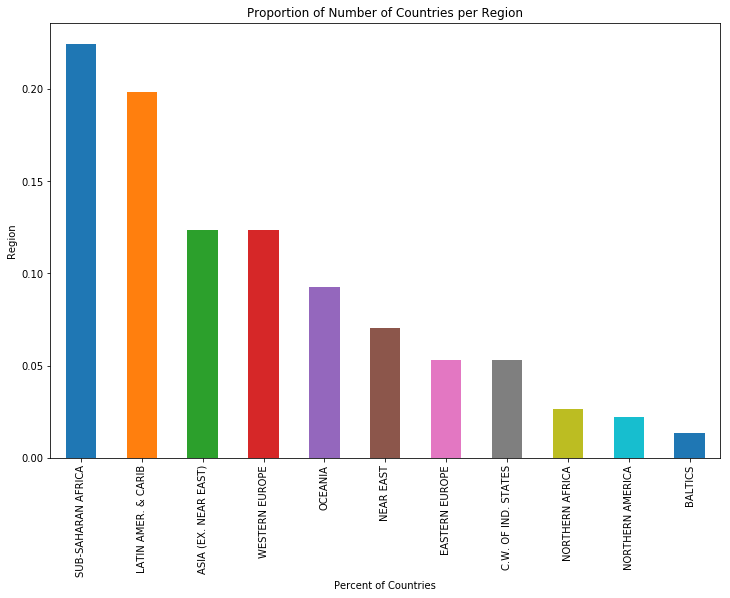

In [40]:
# Proportion of countries per region
(count_countries_per_region/df.shape[0]).plot(kind="bar", figsize=(12,8));
plt.title('Proportion of Number of Countries per Region')
plt.xlabel('Percent of Countries')
plt.ylabel('Region')
plt.show();

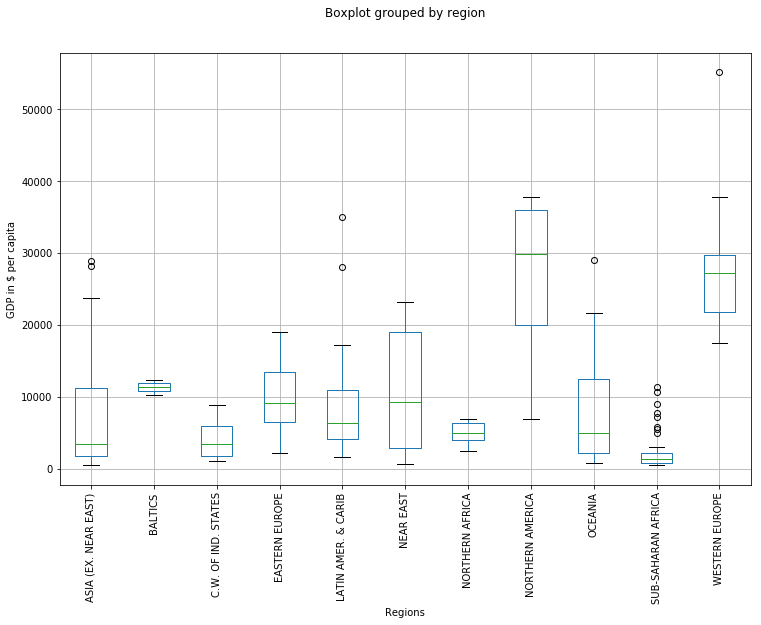

In [41]:
# GDP per region
df.boxplot(column='gdp', by='region', figsize=(12,8));
plt.xticks(rotation=90);
plt.title('')
plt.xlabel('Regions')
plt.ylabel('GDP in $ per capita')
plt.show();

In [42]:
# What countries belong to the NEAR EAST region?
df[df.region == "NEAR EAST"][['country']].sort_values(by=['country'], ascending=True)

,country
15,Bahrain
52,Cyprus
74,Gaza Strip
97,Iraq
100,Israel
105,Jordan
111,Kuwait
115,Lebanon
155,Oman
166,Qatar


In [43]:
# What countries belong to the C.W. OF IND. STATES region?
df[df.region == "C.W. OF IND. STATES"][['country']].sort_values(by=['country'], ascending=True)

,country
9,Armenia
13,Azerbaijan
18,Belarus
75,Georgia
106,Kazakhstan
112,Kyrgyzstan
137,Moldova
169,Russia
199,Tajikistan
207,Turkmenistan


To simplify, combine regions close to each other geographically and in terms of their GDP
- Europe: WESTERN EUROPE + EASTERN EUROPE + BALTICS  + C.W. OF IND. STATES (Belarus, Moldova, Ukraine)
- Africa: SUB-SAHARAN AFRICA + NORTHERN AFRICA
- Latin America and the Caribbean: LATIN AMER. & CARIB
- Northern America: NORTHERN AMERICA
- Asia: ASIA (EX. NEAR EAST) + C.W. OF IND. STATES (Armenia, Azarbaijan, Georgia, Kazakhstan, Kyrgyzstan, Russia, Tajikistan, Turkmenistan, Uzbekistan)
- Oceania: OCEANIA
- Middle East: NEAR EAST

In [44]:
df.loc[df.country == 'Ukraine', 'region2'] = 'Europe'

In [45]:
df[df.country == 'Ukraine']

,country,region,population,area,popdensity,coast,netmigr,infmortality,gdp,literacy,phones,arable,crops,climate,birthrate,deathrate,agriculture,industry,service,region2
211,Ukraine,C.W. OF IND. STATES,46710816,603700,77.40,0.46,-0.39,20.34,5400.00,99.70,259.90,56.21,1.61,3.00,8.82,14.39,0.19,0.45,0.36,Europe


In [46]:
# Remap new region definition to a new region2 column
mask = df.region == 'SUB-SAHARAN AFRICA'
df.loc[mask, 'region2'] = 'Africa'
mask = df.region == 'NORTHERN AFRICA'
df.loc[mask, 'region2'] = 'Africa'

mask = df.region == 'LATIN AMER. & CARIB'
df.loc[mask, 'region2'] = 'Latin America and the Caribbean'

mask = df.region == 'NORTHERN AMERICA'
df.loc[mask, 'region2'] = 'Northern America'

mask = df.region == 'ASIA (EX. NEAR EAST)'
df.loc[mask, 'region2'] = 'Asia'
mask = df.region == 'C.W. OF IND. STATES'
df.loc[mask, 'region2'] = 'Asia'

mask = df.region == 'OCEANIA'
df.loc[mask, 'region2'] = 'Oceania'

mask = df.region == 'NEAR EAST'
df.loc[mask, 'region2'] = 'Middle East'

mask = df.region == 'WESTERN EUROPE'
df.loc[mask, 'region2'] = 'Europe'
mask = df.region == 'EASTERN EUROPE'
df.loc[mask, 'region2'] = 'Europe'
mask = df.region == 'BALTICS'
df.loc[mask, 'region2'] = 'Europe'
df.loc[df.country == 'Belarus', 'region2'] = 'Europe'
df.loc[df.country == 'Moldova', 'region2'] = 'Europe'
df.loc[df.country == 'Ukraine', 'region2'] = 'Europe'

In [47]:
df.sample(10, random_state=rstate).T

,125,122,156,150,79,211,184,167,196,20
country,Malawi,Macau,Pakistan,Nicaragua,Greece,Ukraine,Singapore,Reunion,Switzerland,Belize
region,SUB-SAHARAN AFRICA,ASIA (EX. NEAR EAST),ASIA (EX. NEAR EAST),LATIN AMER. & CARIB,WESTERN EUROPE,C.W. OF IND. STATES,ASIA (EX. NEAR EAST),SUB-SAHARAN AFRICA,WESTERN EUROPE,LATIN AMER. & CARIB
population,13013926,453125,165803560,5570129,10688058,46710816,4492150,787584,7523934,287730
area,118480,28,803940,129494,131940,603700,693,2517,41290,22966
popdensity,109.80,16183.00,206.20,43.00,81.00,77.40,6482.20,312.90,182.20,12.50
coast,0.00,146.43,0.13,0.70,10.37,0.46,27.85,8.22,0.00,1.68
netmigr,0.00,4.86,-2.77,-1.22,2.35,-0.39,11.53,0.00,4.05,0.00
infmortality,103.32,4.39,72.44,29.11,5.53,20.34,2.29,7.78,4.39,25.69
gdp,600.00,19400.00,2100.00,2300.00,20000.00,5400.00,23700.00,5800.00,32700.00,4900.00
literacy,62.70,94.50,45.70,67.50,97.50,99.70,92.50,88.90,99.00,94.10


In [48]:
# Check: What countries belong to the European region?
df[df.region2 == "Europe"][['country']].sort_values(by=['country'], ascending=True)

,country
1,Albania
4,Andorra
12,Austria
18,Belarus
19,Belgium
25,Bosnia & Herzegovina
30,Bulgaria
50,Croatia
53,Czech Republic
54,Denmark


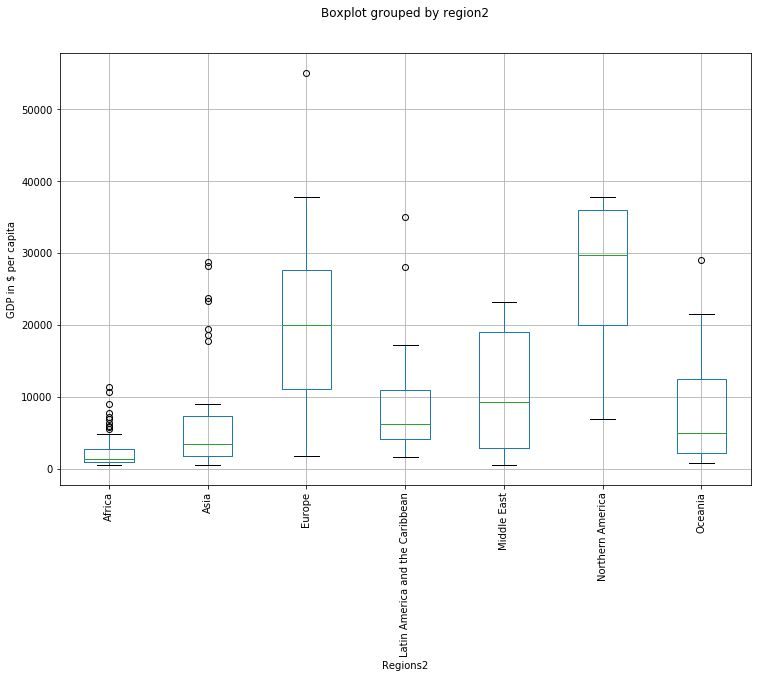

In [49]:
# GDPs per region2
df.boxplot(column='gdp', by='region2', figsize=(12,8));
plt.xticks(rotation=90);
plt.title('')
plt.xlabel('Regions2')
plt.ylabel('GDP in $ per capita')
plt.show();

In [50]:
# New regions by number of countries
df.groupby(['region2']).agg({'country':'count', 'population':'sum', 'area':'sum'}).sort_values(by=['country'], ascending=False)

,country,population,area
region2,,,
Africa,57,910844133,30360296
Europe,46,584910222,5882858
Latin America and the Caribbean,45,561824599,20544084
Asia,37,3906593251,44352412
Oceania,21,33131662,8519812
Middle East,16,195068377,4355586
Northern America,5,331672307,21782471


In [51]:
# Find out more about outliers
gpd_per_country_africa = df[df.region2 == "Africa"][['country', 'gdp']].sort_values(by=['gdp'], ascending=False)
gpd_per_country_africa[gpd_per_country_africa.gdp > 3000]

,country,gdp
133,Mauritius,11400.00
189,South Africa,10700.00
26,Botswana,9000.00
182,Seychelles,7800.00
143,Namibia,7200.00
205,Tunisia,6900.00
118,Libya,6400.00
2,Algeria,6000.00
167,Reunion,5800.00
72,Gabon,5500.00


In [52]:
gpd_per_country_eur = df[df.region2 == "Europe"][['country', 'gdp']].sort_values(by=['gdp'], ascending=False)
gpd_per_country_eur.head(2)

,country,gdp
121,Luxembourg,55100.00
154,Norway,37800.00


In [53]:
gpd_per_country_latin = df[df.region2 == "Latin America and the Caribbean"][['country', 'gdp']].sort_values(by=['gdp'], ascending=False)
gpd_per_country_latin.head(3)

,country,gdp
38,Cayman Islands,35000.00
10,Aruba,28000.00
220,Virgin Islands,17200.00


In [54]:
gpd_per_country_asia = df[df.region2 == "Asia"][['country', 'gdp']].sort_values(by=['gdp'], ascending=False)
gpd_per_country_asia[gpd_per_country_asia.gdp > 10000]

,country,gdp
91,Hong Kong,28800.00
103,Japan,28200.00
184,Singapore,23700.00
198,Taiwan,23400.00
122,Macau,19400.00
29,Brunei,18600.00
110,"Korea, South",17800.00


In [55]:
gpd_per_country_oceania = df[df.region2 == "Oceania"][['country', 'gdp']].sort_values(by=['gdp'], ascending=False)
gpd_per_country_oceania.head(2)

,country,gdp
11,Australia,29000.00
149,New Zealand,21600.00


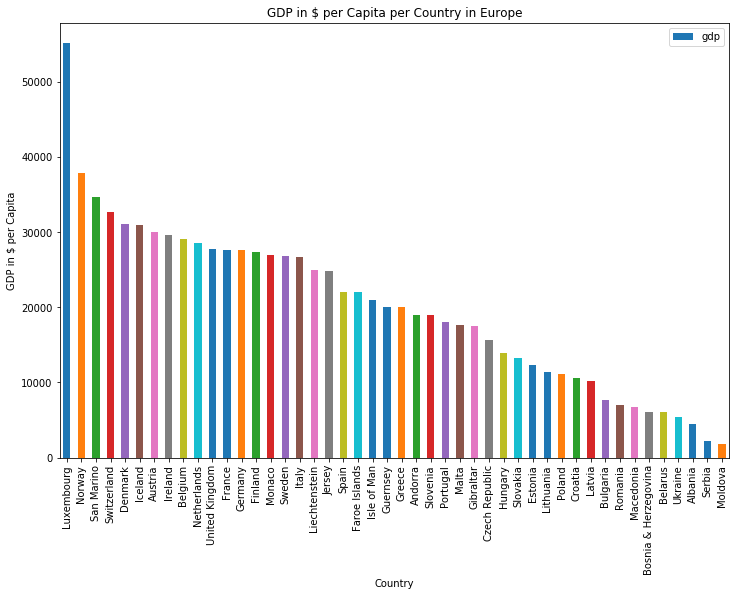

In [56]:
# GDP in $ per Capita per Country in Europe
gpd_per_country_eur.plot(x='country', y='gdp', kind="bar", figsize=(12,8));
plt.title('GDP in $ per Capita per Country in Europe')
plt.xlabel('Country')
plt.ylabel('GDP in $ per Capita')
plt.show();

Continue on missing values handling...

In [57]:
# Count mean European literacy
mean_eur = df[df.region2 == 'Europe']['literacy'].mean()
mean_eur

98.27804878048782

In [58]:
def impute_literacy_for_region2(name='Europe'):
    df['literacy'] = df.apply(
        lambda row: mean_eur if np.isnan(row['literacy']) and row['region2'] == name else row['literacy'], 
        axis=1
    )
    
impute_literacy_for_region2(name='Europe')

In [59]:
# Impute European's mean to the European countries with NaN literacy
region = 'Europe'
mean_oce = df[df.region2 == region]['literacy'].mean()
impute_literacy_for_region2(name=region)

In [60]:
region = 'Oceania'
mean_oce = df[df.region2 == region]['literacy'].mean()
impute_literacy_for_region2(name=region)

In [61]:
region = 'Africa'
mean_afr = df[df.region2 == region]['literacy'].mean()
impute_literacy_for_region2(name=region)

In [62]:
region = 'Latin America and the Caribbean'
mean_afr = df[df.region2 == region]['literacy'].mean()
impute_literacy_for_region2(name=region)

In [63]:
df[df.country == "Gibraltar"]

,country,region,population,area,popdensity,coast,netmigr,infmortality,gdp,literacy,phones,arable,crops,climate,birthrate,deathrate,agriculture,industry,service,region2
78,Gibraltar,WESTERN EUROPE,27928,7,3989.70,171.43,0.00,5.13,17500.00,98.28,877.70,0.00,0.00,nan,10.74,9.31,nan,nan,nan,Europe


In [64]:
df[df['region2'] == 'Europe'][['country', 'literacy']].sort_values(by=['literacy'], ascending=True).head(5)

,country,literacy
1,Albania,86.50
129,Malta,92.80
181,Serbia,93.00
164,Portugal,93.30
177,San Marino,96.00


In [65]:
# Fill all remaining Nan values with mean of columns
df.fillna(df.mean(), inplace=True)

In [66]:
# Remove 'climate' column as it is not clear how it is setup and its variability is low
df.drop('climate', axis=1, inplace=True)

In [67]:
# Missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
region2,0,0.00
gdp,0,0.00
region,0,0.00
population,0,0.00
area,0,0.00
popdensity,0,0.00
coast,0,0.00
netmigr,0,0.00
infmortality,0,0.00
literacy,0,0.00


In [68]:
# Save clean dataset
df.to_parquet('./data/countries of the world clean.parquet')

In [69]:
# Load clean dataset
df = pd.read_parquet('./data/countries of the world clean.parquet', engine='pyarrow')

In [70]:
df.head().T

,0,1,2,3,4
country,Afghanistan,Albania,Algeria,American Samoa,Andorra
region,ASIA (EX. NEAR EAST),EASTERN EUROPE,NORTHERN AFRICA,OCEANIA,WESTERN EUROPE
population,31056997,3581655,32930091,57794,71201
area,647500,28748,2381740,199,468
popdensity,48.00,124.60,13.80,290.40,152.10
coast,0.00,1.26,0.04,58.29,0.00
netmigr,23.06,-4.93,-0.39,-20.71,6.60
infmortality,163.07,21.52,31.00,9.27,4.05
gdp,700.00,4500.00,6000.00,8000.00,19000.00
literacy,36.00,86.50,70.00,97.00,100.00


### Notes

1. The dataset has 20 variables and 227 observations (one per each country).
2. The dataset column names were standardized and their meaning described in the dataset dictionary.
3. There were no duplicated observations in the dataset.
4. The dataset column types were corrected. The quantitative values used colons insted of periods. This was corrected during dataset load.
5. Missing values were imputed (manually and with mean).
6. 2 columns were removed (other - not very meaningful name, climate - for too many missing values).
7. For the analysis, 7 regions have been selected based on the standard geographical regions.

## Data Modeling??

In [ ]:
# How world data attributes are correlated?
fig, ax = plt.subplots(figsize=(14, 14))
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.show();

## Evaluate the Result

### 1. Wealthy vs. Poor Regions
There is one simgle measure of prosperity used in today's economy: GDP (Gross Domestic Product). In our case, GDP is reflected in U.S. dollars per capita. It represents the value of all final goods and services produced within a nation in a given year (2013 in our case), converted at market exchange rates to current U.S. dollars, divided by the average population for the same year.

In [71]:
# Median regions' GDP
df_gdp = pd.DataFrame(df.groupby('region2').median()['gdp'].sort_values(ascending=False))
df_gdp.index.name = 'Region'
df_gdp.columns = ['GDP Per Capita in U.S. Dollars']
df_gdp

,GDP Per Capita in U.S. Dollars
Region,
Northern America,29800.00
Europe,20000.00
Middle East,9250.00
Latin America and the Caribbean,6300.00
Oceania,5000.00
Asia,3400.00
Africa,1400.00


Looking at the world's GDP per capita, we can cluster two groups of regions with a cut at GDP level of 10000: wealthier ones (Northern America and Europe) and poorer ones (Middle East, Latin America and the Caribbean, Oceania, Asia, Africa). In the poorer regions there are also wealthy countries (like Australia in Oceania with GDP of 29000 or Hong Kong and Japan in Asia with GDP above 28000) that is why focusing on a question related to poorer countries in regions, I have used median which is less prone to outliers. Let's call the wealthier regions Group A and the rest Group B.

Going further, some interesting questions arise: What are the distinguishing traits of wealthy (A) and poor (B) regions? What should the poor regions focus on to become wealthier? Let's find out what our data say.

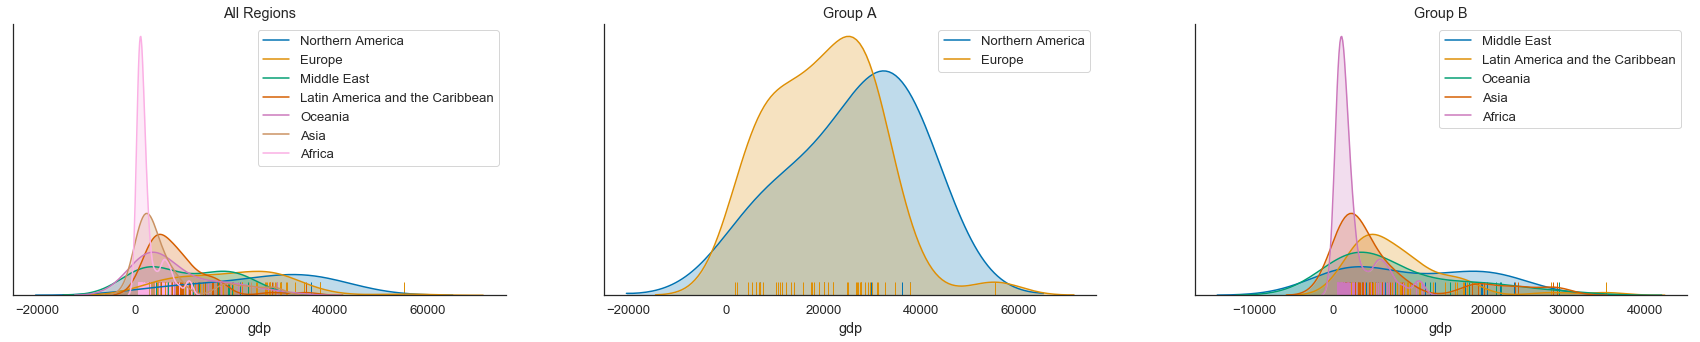

In [72]:
def plot_regions_comparison(attribute='gdp'):
    sns.set(style="white", font_scale=1.2, palette='colorblind')
    f, axes = plt.subplots(1, 3, figsize=(30, 5))

    sns.despine()

    # World
    g = sns.distplot(df[df['region2'] == 'Northern America'][attribute], label='Northern America', hist=False, rug=True, kde_kws={"shade":True}, ax=axes[0])
    sns.distplot(df[df['region2'] == 'Europe'][attribute], label='Europe', hist=False, rug=True, kde_kws={"shade":True}, ax=axes[0])
    sns.distplot(df[df['region2'] == 'Middle East'][attribute], label='Middle East', hist=False, rug=True, kde_kws={"shade":True}, ax=axes[0])
    sns.distplot(df[df['region2'] == 'Latin America and the Caribbean'][attribute], label='Latin America and the Caribbean', hist=False, rug=True, kde_kws={"shade":True}, ax=axes[0])
    sns.distplot(df[df['region2'] == 'Oceania'][attribute], label='Oceania', hist=False, rug=True, kde_kws={"shade":True}, ax=axes[0])
    sns.distplot(df[df['region2'] == 'Asia'][attribute], label='Asia', hist=False, rug=True, kde_kws={"shade":True}, ax=axes[0])
    sns.distplot(df[df['region2'] == 'Africa'][attribute], label='Africa', hist=False, rug=True, kde_kws={"shade":True}, ax=axes[0])

    g.set(yticklabels=[])
    g.set(title='All Regions')
    #g.legend(loc='upper right')

    # Wealthy Regions
    g = sns.distplot(df[df['region2'] == 'Northern America'][attribute], label='Northern America', hist=False, rug=True, kde_kws={"shade":True}, ax=axes[1])
    sns.distplot(df[df['region2'] == 'Europe'][attribute], label='Europe', hist=False, rug=True, kde_kws={"shade":True}, ax=axes[1])

    g.set(yticklabels=[])
    g.set(title='Group A')

    # Poor Regions
    g = sns.distplot(df[df['region2'] == 'Middle East'][attribute], label='Middle East', hist=False, rug=True, kde_kws={"shade":True}, ax=axes[2])
    sns.distplot(df[df['region2'] == 'Latin America and the Caribbean'][attribute], label='Latin America and the Caribbean', hist=False, rug=True, kde_kws={"shade":True}, ax=axes[2])
    sns.distplot(df[df['region2'] == 'Oceania'][attribute], label='Oceania', hist=False, rug=True, kde_kws={"shade":True}, ax=axes[2])
    sns.distplot(df[df['region2'] == 'Asia'][attribute], label='Asia', hist=False, rug=True, kde_kws={"shade":True}, ax=axes[2])
    sns.distplot(df[df['region2'] == 'Africa'][attribute], label='Africa', hist=False, rug=True, kde_kws={"shade":True}, ax=axes[2])

    g.set(yticklabels=[])
    g.set(title='Group B')

    plt.savefig("./pics/{}.png".format(attribute), dpi=600);
    plt.show();
    
plot_regions_comparison('gdp')


In [73]:
# GDP in the North America
gpd_per_country_namerica = df[df.region2 == "Northern America"][['country', 'gdp']].sort_values(by=['gdp'], ascending=False)
gpd_per_country_namerica

,country,gdp
214,United States,37800.00
22,Bermuda,36000.00
36,Canada,29800.00
80,Greenland,20000.00
174,St Pierre & Miquelon,6900.00


In [74]:
# Wealthest Asia countries
gpd_per_country_asia = df[df.region2 == "Asia"][['country', 'gdp']].sort_values(by=['gdp'], ascending=False)
gpd_per_country_asia[gpd_per_country_asia.gdp > 20000]

,country,gdp
91,Hong Kong,28800.00
103,Japan,28200.00
184,Singapore,23700.00
198,Taiwan,23400.00


Within the Group A regions, Eastern European countries are the poorest ones which is represented by a hump in the left slope of the Europe's distribution. North America countries seem to be more left skewed towards higher GDP. The majority of Group A countries have GDP above 20000. The The Luxemburg's GDP of 55100 stays above all. This is a very good result for this small European country. 

The Group B regions tend to have right-skewed distributions of countries' GDP with Africa having the lowest GDP of all, then Asia and the best of them Middle East. The long right tail represents the wealthier countries withing the poorer regions like Australia, Hong Kong, Japan or Singapure having GDP on the European level. For the Group B regions, we will focus on poorer countries only to see what should be their economical focus in order to catch up the Group A regions or leading countries within Group B.

So, what are exactly the differences in the world's data regarding wealthier and poorer regions? Let's find out by comparing selected economic attributes: literacy, agriculture, industry, and service. 

#### Literacy

Literacy is the ability to read and write.

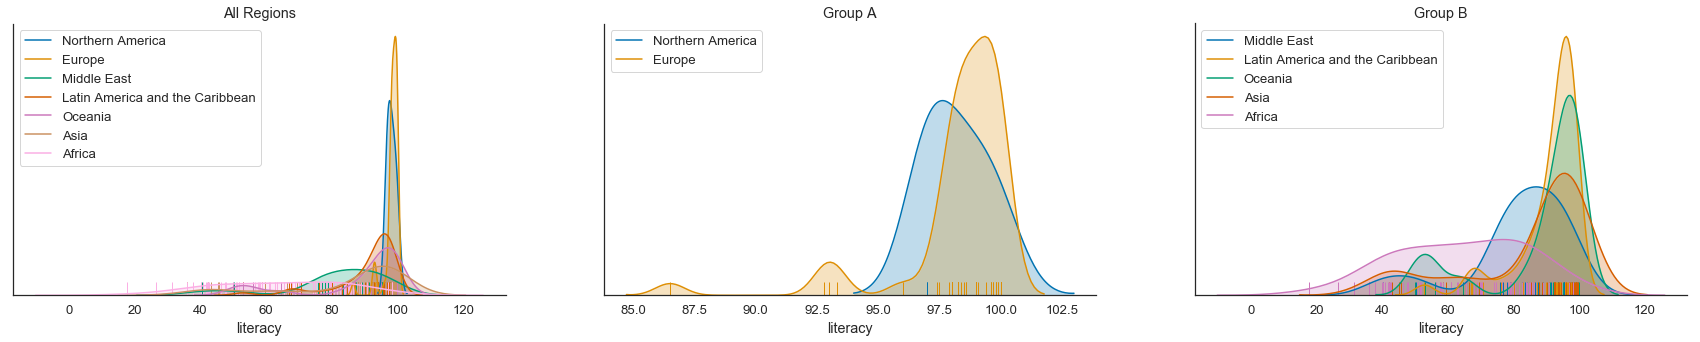

In [75]:
plot_regions_comparison('literacy')

In [76]:
df[df['region2'] == 'Europe'][['country', 'literacy']].sort_values(by=['literacy'], ascending=True).head(5)

,country,literacy
1,Albania,86.50
129,Malta,92.80
181,Serbia,93.00
164,Portugal,93.30
177,San Marino,96.00


In [77]:
df[df['region2'] == 'Africa'][['country', 'literacy']].sort_values(by=['literacy'], ascending=True).head(10)

,country,literacy
151,Niger,17.60
31,Burkina Faso,26.60
183,Sierra Leone,31.40
86,Guinea,35.90
188,Somalia,37.80
73,"Gambia, The",40.10
180,Senegal,40.20
21,Benin,40.90
132,Mauritania,41.70
5,Angola,42.00


In [78]:
df[df['region2'] == 'Asia'][['country', 'literacy']].sort_values(by=['literacy'], ascending=False).head(10)

,country,literacy
169,Russia,99.60
199,Tajikistan,99.40
216,Uzbekistan,99.30
75,Georgia,99.00
109,"Korea, North",99.00
103,Japan,99.00
9,Armenia,98.60
106,Kazakhstan,98.40
207,Turkmenistan,98.00
110,"Korea, South",97.90


Literacy seems to be one of the big differentiators. Group A regions has literacy level above 85% of the population with the worst results by Albania (86.5%), Malta (92.80%) and Serbia (93%), whereas Group B starts from 17.5% (Niger) and many other African, Middle East or Oceania countries way below 80%.

The Group B should focus on improving education level of their population leading to more innovative societes. More educated people would have easier access to knowledge (the Internet, books). It would be easier to them to exchange and implement other nations' ideas leading to prosperity and further educational growth.

#### Agriculture

The agriculture world data indicator is percentage of GDP sector composition ratio for agriculture economy sector. Agriculture indicator, together with the other two: Industry and Service, constitute 100% of GDP of a country.

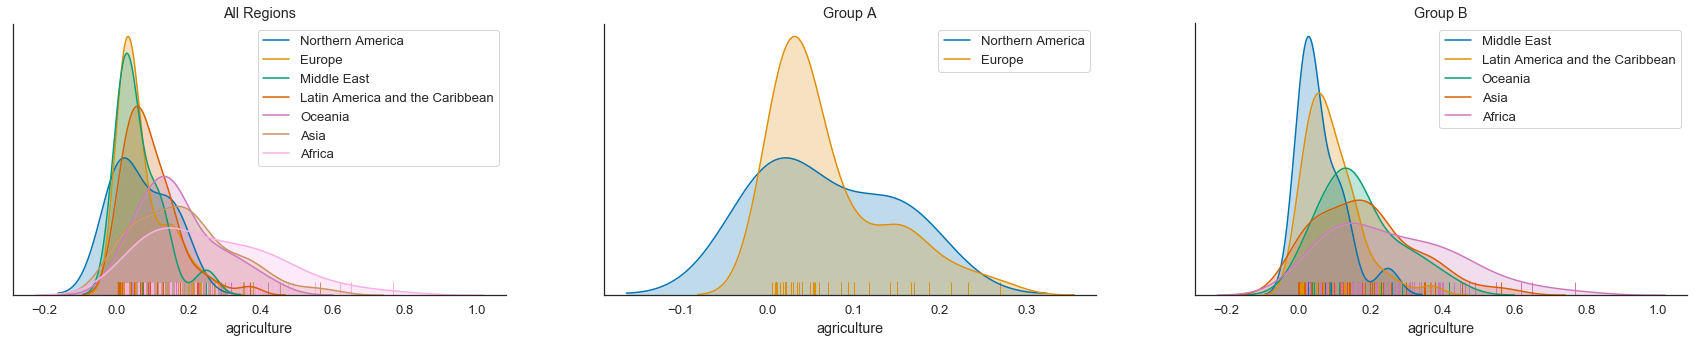

In [79]:
plot_regions_comparison('agriculture')

In [83]:
df[df['region2'] == 'Northern America'][['country', 'agriculture']].sort_values(by=['agriculture'], ascending=True)

,country,agriculture
22,Bermuda,0.01
214,United States,0.01
36,Canada,0.02
80,Greenland,0.15
174,St Pierre & Miquelon,0.15


In [86]:
df[df['region2'] == 'Europe'][['country', 'agriculture']].sort_values(by=['agriculture'], ascending=True)

,country,agriculture
213,United Kingdom,0.01
76,Germany,0.01
19,Belgium,0.01
121,Luxembourg,0.01
99,Isle of Man,0.01
195,Sweden,0.01
196,Switzerland,0.01
12,Austria,0.02
54,Denmark,0.02
154,Norway,0.02


In [89]:
df[df['region2'] == 'Africa'][['country', 'agriculture']].sort_values(by=['agriculture'], ascending=False).head(10)

,country,agriculture
117,Liberia,0.77
188,Somalia,0.65
87,Guinea-Bissau,0.62
39,Central African Rep.,0.55
45,"Congo, Dem. Rep.",0.55
183,Sierra Leone,0.49
65,Ethiopia,0.47
33,Burundi,0.46
128,Mali,0.45
35,Cameroon,0.45


Agriculture in more developed countries takes only a fraction of a small portion of their GDP per capita. All Group A countries have agriculture indicator value below 27% with the more developed countries below the ratio of 5%.

In the Group B, we can notice that the percentage of GDP agriculture ration is more significant. Countries like Liberia (77%), Somallia (65%) or Guinea-Bissau (62%) take the lead here.

The low ratio does not necessarily mean that more developed countries have worse agriculture indicators, it rather means that other economy sectors (Industry or Service) take precedence in influencing their GDP being more profitable comparing to agriculture.

The Group B countries should focus on developing innovative industry and service sector to become more competitive. Having stronger industry and service sectors would also influence positively agriculture with more modern, productive an healhty treatment. 

#### Industry

The Industry indicator shows the percentage of GDP sector composition ratio for industry economy sector.

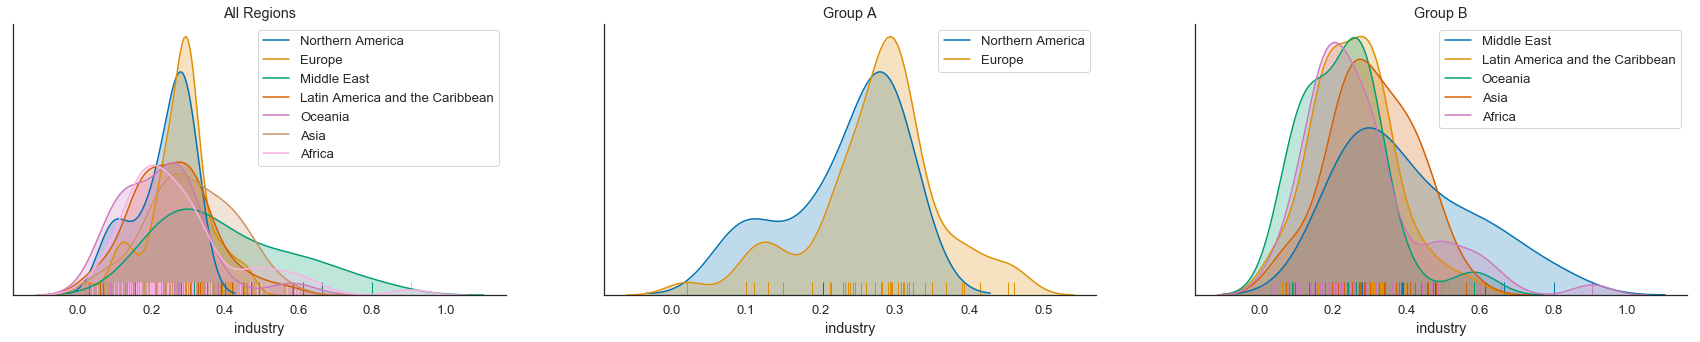

In [90]:
plot_regions_comparison('industry')

XXXXXX

#### Service
percentage of GDP sector composition ratio for service economy sector (znalezc lepszy opis?)

In [ ]:
sns.set(style="white", font_scale=1.2, palette='colorblind')
f, axes = plt.subplots(1, 3, figsize=(30, 5))

sns.despine()

# World's service
g = sns.distplot(df[df['region2'] == 'Asia'].service, label='Asia', hist=False, rug=True, kde_kws={"shade":True}, ax=axes[0])
sns.distplot(df[df['region2'] == 'Africa'].service, label='Africa', hist=False, rug=True, kde_kws={"shade":True}, ax=axes[0])
sns.distplot(df[df['region2'] == 'Western Europe'].service, label='Western Europe', hist=False, rug=True, kde_kws={"shade":True}, ax=axes[0])
sns.distplot(df[df['region2'] == 'Eastern Europe'].service, label='Eastern Europe', hist=False, rug=True, kde_kws={"shade":True}, ax=axes[0])
sns.distplot(df[df['region2'] == 'Latin America and the Caribbean'].service, label='Latin America and the Caribbean', hist=False, rug=True, kde_kws={"shade":True}, ax=axes[0])
sns.distplot(df[df['region2'] == 'Northern America'].service, label='Northern America', hist=False, rug=True, kde_kws={"shade":True}, ax=axes[0])

g.set(yticklabels=[])
g.set(title='All Regions')

# Poor Regions' service
g = sns.distplot(df[df['region2'] == 'Western Europe'].service, label='Western Europe', hist=False, rug=True, kde_kws={"shade":True}, ax=axes[1])
sns.distplot(df[df['region2'] == 'Eastern Europe'].service, label='Eastern Europe', hist=False, rug=True, kde_kws={"shade":True}, ax=axes[1])
sns.distplot(df[df['region2'] == 'Northern America'].service, label='Northern America', hist=False, rug=True, kde_kws={"shade":True}, ax=axes[1])

g.set(yticklabels=[])
g.set(title='Group A')

# Wealthy Regions' service
g = sns.distplot(df[df['region2'] == 'Asia'].service, label='Asia', hist=False, rug=True, kde_kws={"shade":True}, ax=axes[2])
sns.distplot(df[df['region2'] == 'Africa'].service, label='Africa', hist=False, rug=True, kde_kws={"shade":True}, ax=axes[2])
sns.distplot(df[df['region2'] == 'Latin America and the Caribbean'].service, label='Latin America and the Caribbean', hist=False, rug=True, kde_kws={"shade":True}, ax=axes[2])

g.set(yticklabels=[])
g.set(title='Group B')

plt.savefig("./pics/service.png", dpi=600);
plt.show();

To summarize... powtorzyc najwazniejsze z question 1

In [ ]:
# Find outliers
area_per_country_weur = df[df.region2 == "Western Europe"][['country', 'area']].sort_values(by=['area'], ascending=False)
area_per_country_weur.head()

In [ ]:
sns.set(style="white", font_scale=1.2, palette='colorblind')
f, axes = plt.subplots(1, 3, figsize=(20, 5))

sns.despine()

# Area
sns.distplot(df[df['region2'] == 'Asia'].area, label='Asia', axlabel='aa', hist=False, kde_kws={"shade":True}, ax=axes[0])
sns.distplot(df[df['region2'] == 'Africa'].area, label='Africa', hist=False, kde_kws={"shade":True}, ax=axes[0])
sns.distplot(df[df['region2'] == 'Western Europe'].area, label='Western Europe', hist=False, kde_kws={"shade":True}, ax=axes[0])
sns.distplot(df[df['region2'] == 'Eastern Europe'].area, label='Eastern Europe', hist=False, kde_kws={"shade":True}, ax=axes[0])
sns.distplot(df[df['region2'] == 'Latin America and the Caribbean'].area, label='Latin America and the Caribbean', hist=False, kde_kws={"shade":True}, ax=axes[0])
sns.distplot(df[df['region2'] == 'Northern America'].area, label='Northern America', hist=False, kde_kws={"shade":True}, ax=axes[0])

# GDP
sns.distplot(df[df['region2'] == 'Asia'].gdp, label='Asia', hist=False, kde_kws={"shade":True}, ax=axes[1])
sns.distplot(df[df['region2'] == 'Africa'].gdp, label='Africa', hist=False, kde_kws={"shade":True}, ax=axes[1])
sns.distplot(df[df['region2'] == 'Western Europe'].gdp, label='Western Europe', hist=False, kde_kws={"shade":True}, ax=axes[1])
sns.distplot(df[df['region2'] == 'Eastern Europe'].gdp, label='Eastern Europe', hist=False, kde_kws={"shade":True}, ax=axes[1])
sns.distplot(df[df['region2'] == 'Latin America and the Caribbean'].gdp, label='Latin America and the Caribbean', hist=False, kde_kws={"shade":True}, ax=axes[1])
sns.distplot(df[df['region2'] == 'Northern America'].gdp, label='Northern America', hist=False, kde_kws={"shade":True}, ax=axes[1])

# Literacy
sns.distplot(df[df['region2'] == 'Asia'].literacy, label='Asia', hist=False, kde_kws={"shade":True}, ax=axes[2])
sns.distplot(df[df['region2'] == 'Africa'].literacy, label='Africa', hist=False, kde_kws={"shade":True}, ax=axes[2])
sns.distplot(df[df['region2'] == 'Western Europe'].literacy, label='Western Europe', hist=False, kde_kws={"shade":True}, ax=axes[2])
sns.distplot(df[df['region2'] == 'Eastern Europe'].literacy, label='Eastern Europe', hist=False, kde_kws={"shade":True}, ax=axes[2])
sns.distplot(df[df['region2'] == 'Latin America and the Caribbean'].literacy, label='Latin America and the Caribbean', hist=False, kde_kws={"shade":True}, ax=axes[2])
sns.distplot(df[df['region2'] == 'Northern America'].literacy, label='Northern America', hist=False, kde_kws={"shade":True}, ax=axes[2])

plt.show();

In [ ]:
x = df.loc[:, ["region2", "gdp", "infmortality", "birthrate", "phones", "literacy", "service"]]
sns.pairplot(x, hue="region2", palette="inferno");

In [ ]:
sns.set(style="white", font_scale=1.2, palette='colorblind')
f, axes = plt.subplots(1, 3, figsize=(20, 5))

sns.despine()

# Agriculture
sns.distplot(df[df['region2'] == 'Asia'].agriculture, label='Asia', hist=False, kde_kws={"shade":True}, ax=axes[0])
sns.distplot(df[df['region2'] == 'Africa'].agriculture, label='Africa', hist=False, kde_kws={"shade":True}, ax=axes[0])
sns.distplot(df[df['region2'] == 'Western Europe'].agriculture, label='Western Europe', hist=False, kde_kws={"shade":True}, ax=axes[0])
sns.distplot(df[df['region2'] == 'Eastern Europe'].agriculture, label='Eastern Europe', hist=False, kde_kws={"shade":True}, ax=axes[0])
sns.distplot(df[df['region2'] == 'Latin America and the Caribbean'].agriculture, label='Latin America and the Caribbean', hist=False, kde_kws={"shade":True}, ax=axes[0])
sns.distplot(df[df['region2'] == 'Northern America'].agriculture, label='Northern America', hist=False, kde_kws={"shade":True}, ax=axes[0])

# Industry
sns.distplot(df[df['region2'] == 'Asia'].industry, hist=False, kde_kws={"shade":True}, ax=axes[1])
sns.distplot(df[df['region2'] == 'Africa'].industry, hist=False, kde_kws={"shade":True}, ax=axes[1])
sns.distplot(df[df['region2'] == 'Western Europe'].industry, hist=False, kde_kws={"shade":True}, ax=axes[1])
sns.distplot(df[df['region2'] == 'Eastern Europe'].industry, hist=False, kde_kws={"shade":True}, ax=axes[1])
sns.distplot(df[df['region2'] == 'Latin America and the Caribbean'].industry, hist=False, kde_kws={"shade":True}, ax=axes[1])
sns.distplot(df[df['region2'] == 'Northern America'].industry, hist=False, kde_kws={"shade":True}, ax=axes[1])

# Service
sns.distplot(df[df['region2'] == 'Asia'].service, hist=False, kde_kws={"shade":True}, ax=axes[2])
sns.distplot(df[df['region2'] == 'Africa'].service, hist=False, kde_kws={"shade":True}, ax=axes[2])
sns.distplot(df[df['region2'] == 'Western Europe'].service, hist=False, kde_kws={"shade":True}, ax=axes[2])
sns.distplot(df[df['region2'] == 'Eastern Europe'].service, hist=False, kde_kws={"shade":True}, ax=axes[2])
sns.distplot(df[df['region2'] == 'Latin America and the Caribbean'].service, hist=False, kde_kws={"shade":True}, ax=axes[2])
sns.distplot(df[df['region2'] == 'Northern America'].service, hist=False, kde_kws={"shade":True}, ax=axes[2])

#plt.legend( loc=2, borderaxespad=0.)

#
plt.show();

In [ ]:
x = df.loc[:, ["region2", "gdp", "agriculture", "industry", "service", "literacy"]]
sns.pairplot(x, hue="region2", palette="colorblind");

In [ ]:
sns.set(style="white", font_scale=1.2, palette='colorblind')
f, axes = plt.subplots(3, 2, figsize=(20, 20))

sns.despine()

# Birthrate
sns.distplot(df[df['region2'] == 'Asia'].birthrate, label='Asia', hist=False, kde_kws={"shade":True}, ax=axes[0,0])
sns.distplot(df[df['region2'] == 'Africa'].birthrate, label='Africa', hist=False, kde_kws={"shade":True}, ax=axes[0,0])
sns.distplot(df[df['region2'] == 'Western Europe'].birthrate, label='Western Europe', hist=False, kde_kws={"shade":True}, ax=axes[0,0])
sns.distplot(df[df['region2'] == 'Eastern Europe'].birthrate, label='Eastern Europe', hist=False, kde_kws={"shade":True}, ax=axes[0,0])
sns.distplot(df[df['region2'] == 'Latin America and the Caribbean'].birthrate, label='Latin America and the Caribbean', hist=False, kde_kws={"shade":True}, ax=axes[0,0])
sns.distplot(df[df['region2'] == 'Northern America'].birthrate, label='Northern America', hist=False, kde_kws={"shade":True}, ax=axes[0,0])

# Population
sns.distplot(df[df['region2'] == 'Asia'].population, label='Asia', hist=False, kde_kws={"shade":True}, ax=axes[0,1])
sns.distplot(df[df['region2'] == 'Africa'].population, label='Africa', hist=False, kde_kws={"shade":True}, ax=axes[0,1])
sns.distplot(df[df['region2'] == 'Western Europe'].population, label='Western Europe', hist=False, kde_kws={"shade":True}, ax=axes[0,1])
sns.distplot(df[df['region2'] == 'Eastern Europe'].population, label='Eastern Europe', hist=False, kde_kws={"shade":True}, ax=axes[0,1])
sns.distplot(df[df['region2'] == 'Latin America and the Caribbean'].population, label='Latin America and the Caribbean', hist=False, kde_kws={"shade":True}, ax=axes[0,1])
sns.distplot(df[df['region2'] == 'Northern America'].population, label='Northern America', hist=False, kde_kws={"shade":True}, ax=axes[0,1])

# Population Density
sns.distplot(df[df['region2'] == 'Asia'].popdensity, label='Asia', hist=False, kde_kws={"shade":True}, ax=axes[1,0])
sns.distplot(df[df['region2'] == 'Africa'].popdensity, label='Africa', hist=False, kde_kws={"shade":True}, ax=axes[1,0])
sns.distplot(df[df['region2'] == 'Western Europe'].popdensity, label='Western Europe', hist=False, kde_kws={"shade":True}, ax=axes[1,0])
sns.distplot(df[df['region2'] == 'Eastern Europe'].popdensity, label='Eastern Europe', hist=False, kde_kws={"shade":True}, ax=axes[1,0])
sns.distplot(df[df['region2'] == 'Latin America and the Caribbean'].popdensity, label='Latin America and the Caribbean', hist=False, kde_kws={"shade":True}, ax=axes[1,0])
sns.distplot(df[df['region2'] == 'Northern America'].popdensity, label='Northern America', hist=False, kde_kws={"shade":True}, ax=axes[1,0])

# GDP
sns.distplot(df[df['region2'] == 'Asia'].gdp, label='Asia', hist=False, kde_kws={"shade":True}, ax=axes[1,1])
sns.distplot(df[df['region2'] == 'Africa'].gdp, label='Africa', hist=False, kde_kws={"shade":True}, ax=axes[1,1])
sns.distplot(df[df['region2'] == 'Western Europe'].gdp, label='Western Europe', hist=False, kde_kws={"shade":True}, ax=axes[1,1])
sns.distplot(df[df['region2'] == 'Eastern Europe'].gdp, label='Eastern Europe', hist=False, kde_kws={"shade":True}, ax=axes[1,1])
sns.distplot(df[df['region2'] == 'Latin America and the Caribbean'].gdp, label='Latin America and the Caribbean', hist=False, kde_kws={"shade":True}, ax=axes[1,1])
sns.distplot(df[df['region2'] == 'Northern America'].gdp, label='Northern America', hist=False, kde_kws={"shade":True}, ax=axes[1,1])

# Literacy
sns.distplot(df[df['region2'] == 'Asia'].literacy, label='Asia', hist=False, kde_kws={"shade":True}, ax=axes[2,0])
sns.distplot(df[df['region2'] == 'Africa'].literacy, label='Africa', hist=False, kde_kws={"shade":True}, ax=axes[2,0])
sns.distplot(df[df['region2'] == 'Western Europe'].literacy, label='Western Europe', hist=False, kde_kws={"shade":True}, ax=axes[2,0])
sns.distplot(df[df['region2'] == 'Eastern Europe'].literacy, label='Eastern Europe', hist=False, kde_kws={"shade":True}, ax=axes[2,0])
sns.distplot(df[df['region2'] == 'Latin America and the Caribbean'].literacy, label='Latin America and the Caribbean', hist=False, kde_kws={"shade":True}, ax=axes[2,0])
sns.distplot(df[df['region2'] == 'Northern America'].literacy, label='Northern America', hist=False, kde_kws={"shade":True}, ax=axes[2,0])

plt.show();

In [ ]:
x = df.loc[:, ["region2", "gdp", "infmortality", "birthrate", "phones", "literacy", "service"]]
sns.pairplot(x, hue="region2", palette="inferno");

It is interesting how different regions on the same continent can be (Europe). The West European countries have generally better indicators than East European countires, which is due to longer period of prosperity, democratic or republic systems and consideration for the law.

### 2. What can we do to limit infant mortality?

In [ ]:
import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

#Population per country
data = dict(type='choropleth',
locations = df.country,
locationmode = 'country names', z = df.infmortality,
text = df.country, colorbar = {'title':'Infant Mortality'},
colorscale = 'YlOrRd', reversescale = True)
layout = dict(title='Infant Mortality per Country',
geo = dict(showframe=False,projection={'type':'natural earth'}))
choromap = go.Figure(data = [data],layout = layout)
iplot(choromap,validate=False)

In [ ]:
#Population per country
data = dict(type='choropleth',
locations = df.country,
locationmode = 'country names', z = df.gdp,
text = df.country, colorbar = {'title':'GDP'},
colorscale = 'Hot', reversescale = True)
layout = dict(title='GDP of World Countries',
geo = dict(showframe=False,projection={'type':'natural earth'}))
choromap = go.Figure(data = [data],layout = layout)
iplot(choromap,validate=False)

In [ ]:
# How infant mortality is related to other features?
#df[df.columns[:]].corr()['infmortality'][:]
pd.DataFrame(df.corr()['infmortality'].sort_values(ascending=False))

In [ ]:
# What influences infant mortality most?
df.corr()['infmortality'].sort_values(ascending=False)[1:].plot(kind='bar', figsize=(10,8));
plt.title('Infant Mortality Influencers')
plt.xlabel('Influencers')
plt.ylabel('Pearson Correlation')
plt.show();

Infant mortality is the death of young children under the age of 1. This death toll is measured by the infant mortality rate (IMR), which is the number of deaths of children under one year of age per 1000 live births. In the 21st century, in the age of robotics, genetics and sophisticated healthcare the mortality rate should be greatly minimized. Yet there are still regions where XXX per 1000 dies during the first year after birth.

Looking at the world maps of mortality and gdp we see they are like inverse of each other. Countries with greater GDP have lower infant mortality and vice versa.

Looking at the world data we can clearly see that the more agricultural the country is, the greater chance of premature mortality exists. The more educated and wealthy the nation is, the more chance infants have to survive. In this context, it is important to that richer and developed countries help the poorer ones both economically and in terms of education. The more aware and enlightened people are, the bigger care they can put into proper health-care infrastructure and treatment (vaccination, healthy life style and medical examinations while pregnant, breastfeeding, etc.) the more chance to survive infants have. All of these may happen more frequently in richer and peaceful societies.

### 3.

## Deploy

In [ ]:
# post + model for prediction